In [1]:
import pandas as pd
import numpy as np
import random
import umap
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer
%matplotlib notebook



In [2]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
set_seed()

In [3]:
labels = ['Conspiracist Ideation','Distrust', 'Unwarranted Beliefs', 'Worldview and Politics', 'Religious Concerns',
          'Moral Concerns', 'Fear and Phobias', 'Distorted Risk Perception', 'Perceived Self-interest', 'Epistemic Relativism', 'Reactance'] 

In [4]:
colors = ['red','orange','black','purple', 'blue', 'green', 'brown', 'grey', 'lime', 'cyan', 'pink']

In [5]:
c_dict_full = {labels[i]: colors[i] for i in range(11)}

In [6]:
c_dict_full

{'Conspiracist Ideation': 'red',
 'Distrust': 'orange',
 'Unwarranted Beliefs': 'black',
 'Worldview and Politics': 'purple',
 'Religious Concerns': 'blue',
 'Moral Concerns': 'green',
 'Fear and Phobias': 'brown',
 'Distorted Risk Perception': 'grey',
 'Perceived Self-interest': 'lime',
 'Epistemic Relativism': 'cyan',
 'Reactance': 'pink'}

In [7]:
c_dict_full['Epistemic relativism'] = 'cyan'
c_dict_full['Reactance'] = 'pink'

In [8]:
model_type = 'paraphrase-mpnet-base-v2'
model_st = SentenceTransformer(model_type)

In [9]:
study2_single_full = pd.read_csv('data/full_single_label/study_2_single_label.csv')
meta_single_full = pd.read_csv('data/full_single_label/meta_single_label.csv')
abstract_full = pd.read_csv('data/abstract/full_abstract.csv')
fn_txt_labels = [labels[i] for i in study2_single_full['labels'].to_list()]
meta_txt_labels = [labels[i] for i in meta_single_full['labels'].to_list()]
abstract_txt_labels = [labels[i] for i in abstract_full['label'].to_list()]
study2_single_full['text_labels'] = fn_txt_labels
meta_single_full['text_labels'] = meta_txt_labels
abstract_full['text_labels'] = abstract_txt_labels

In [10]:
meta_embeddings = model_st.encode(meta_single_full['text'].to_list())
study2_embeddings = model_st.encode(study2_single_full['text'].to_list())
abstract_embeddings = model_st.encode(abstract_full['text'].to_list())

In [11]:
fit = umap.UMAP(random_state=42)
meta_umap = fit.fit_transform(meta_embeddings)
fn_map = fit.fit_transform(study2_embeddings)
abs_map = fit.fit_transform(abstract_embeddings)

In [12]:
fit_3 = umap.UMAP(n_components=3, random_state=42)
meta_umap_3 = fit_3.fit_transform(meta_embeddings)
fn_map_3 = fit_3.fit_transform(study2_embeddings)
abs_map_3 = fit_3.fit_transform(abstract_embeddings)

In [13]:
def plotstuff(df, embedding, c_dict, title):
    fig, ax = plt.subplots()

    for g in np.unique(df.text_labels):
        ix = np.where(df.text_labels == g)
        ax.scatter(embedding[:,0][ix], embedding[:,1][ix], c = c_dict[g], label = g, s = 50)
    ax.legend()
    plt.gcf().set_size_inches((10, 10))
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    #ax.legend(fontsize="x-large", bbox_to_anchor=(1.0, 0), loc="lower right", ncol=2, fancybox=True, shadow=True, bbox_transform=fig.transFigure)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
    #      ncol=3, fancybox=True, shadow=True, fontsize="x-large")
    plt.title(title, fontsize=18)
    plt.savefig('output/'+title+'.png')
    plt.show()
    
    

In [14]:
def plot3dstuff(df, embedding, c_dict, title):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')

    for g in np.unique(df.text_labels):
        ix = np.where(df.text_labels == g)
        ax.scatter(embedding[:,0][ix], embedding[:,1][ix], embedding[:,2][ix], c = c_dict[g], label = g, s = 50)
    ax.legend()
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
    #      ncol=3, fancybox=True, shadow=True, fontsize="x-large")

    plt.title(title, fontsize=18)
    plt.savefig('output/'+title+'.png')
    #plt.show()
    
    
    fig = plt.figure(figsize=(12,12))
    ax = Axes3D(fig)
    for g in np.unique(df.text_labels):
        ix = np.where(df.text_labels == g)
        ax.scatter(embedding[:,0][ix], embedding[:,1][ix], embedding[:,2][ix], c = c_dict[g], label = g, s = 50)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')
    fig.suptitle(title)
    fig.legend()
    def rotate(angle):
        ax.view_init(azim=angle)

    angle = 3
    ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
    ani.save('output/'+title+'.gif', writer=animation.PillowWriter(fps=20))


## Specific, Abstract Level

<IPython.core.display.Javascript object>


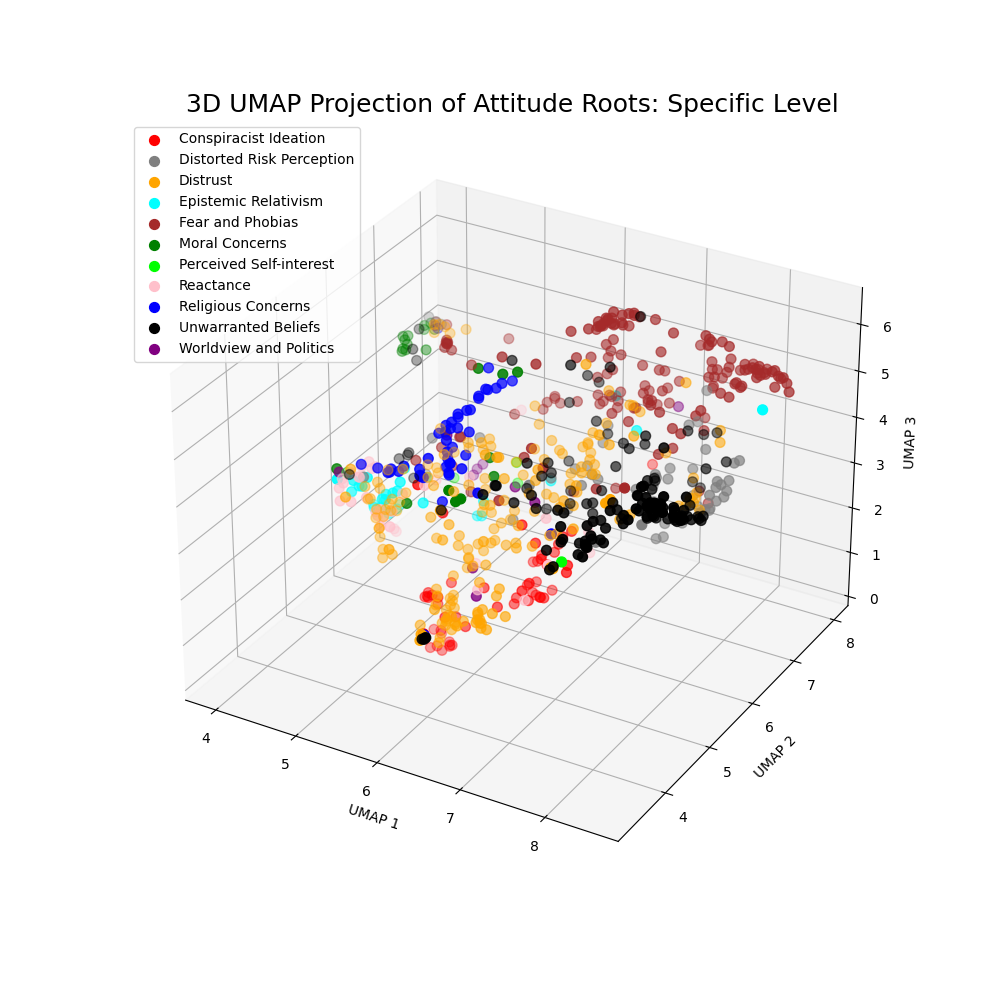

<IPython.core.display.Javascript object>


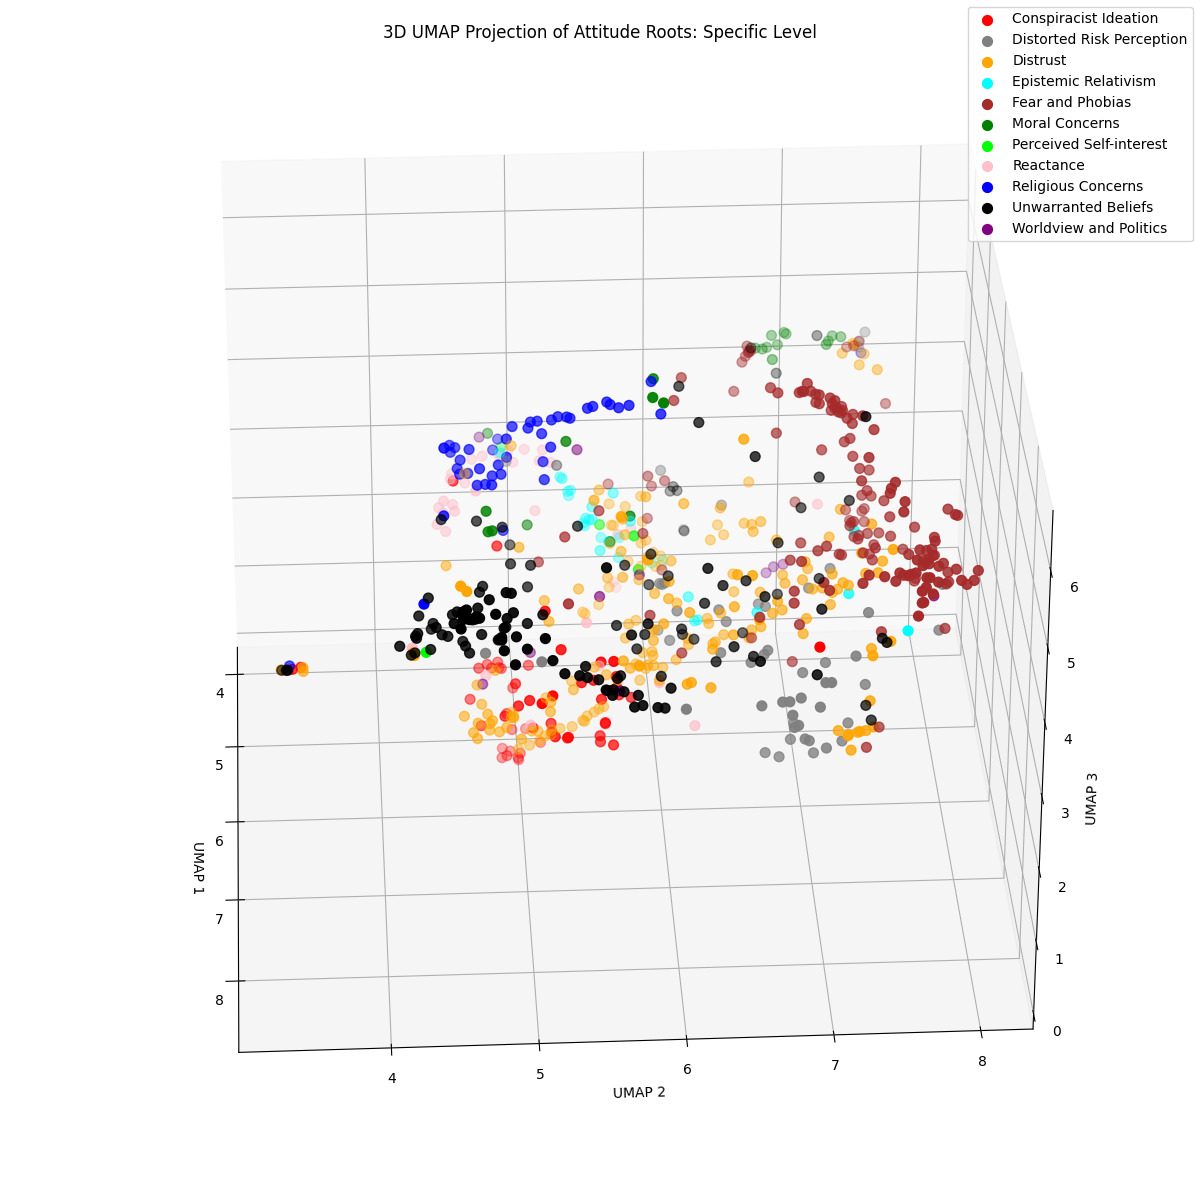

/tmp/ipykernel_122431/2814612596.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [15]:
%matplotlib notebook
plot3dstuff(meta_single_full, meta_umap_3, c_dict_full, title='3D UMAP Projection of Attitude Roots: Specific Level')

<IPython.core.display.Javascript object>


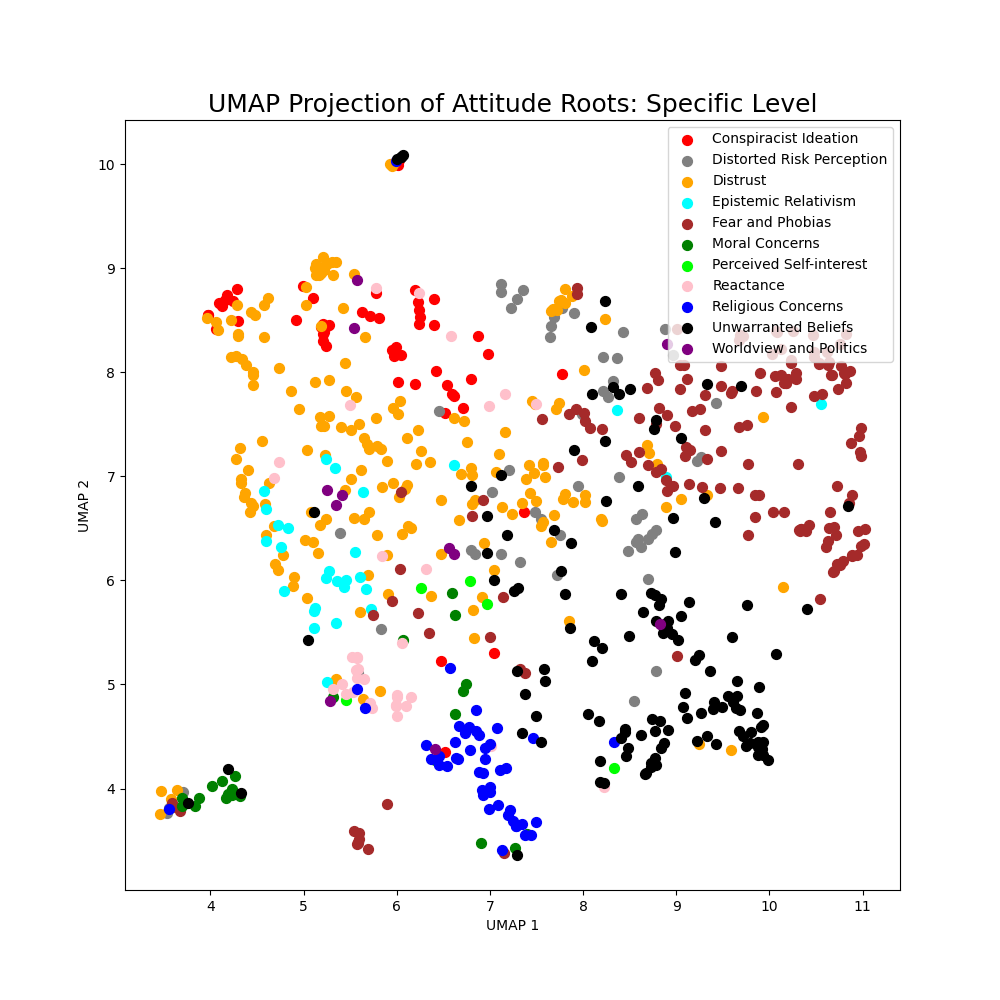

In [16]:
plotstuff(meta_single_full, meta_umap, c_dict_full, title='UMAP Projection of Attitude Roots: Specific Level')

<IPython.core.display.Javascript object>


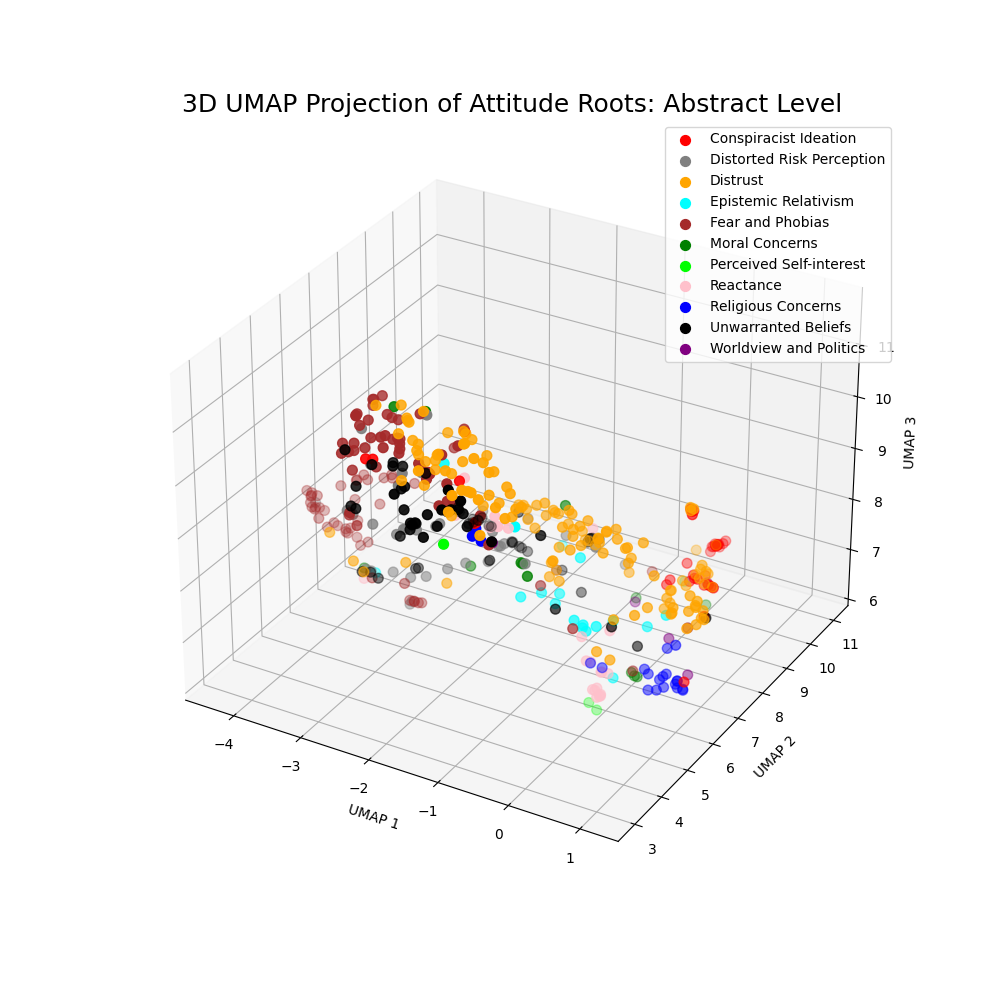

<IPython.core.display.Javascript object>


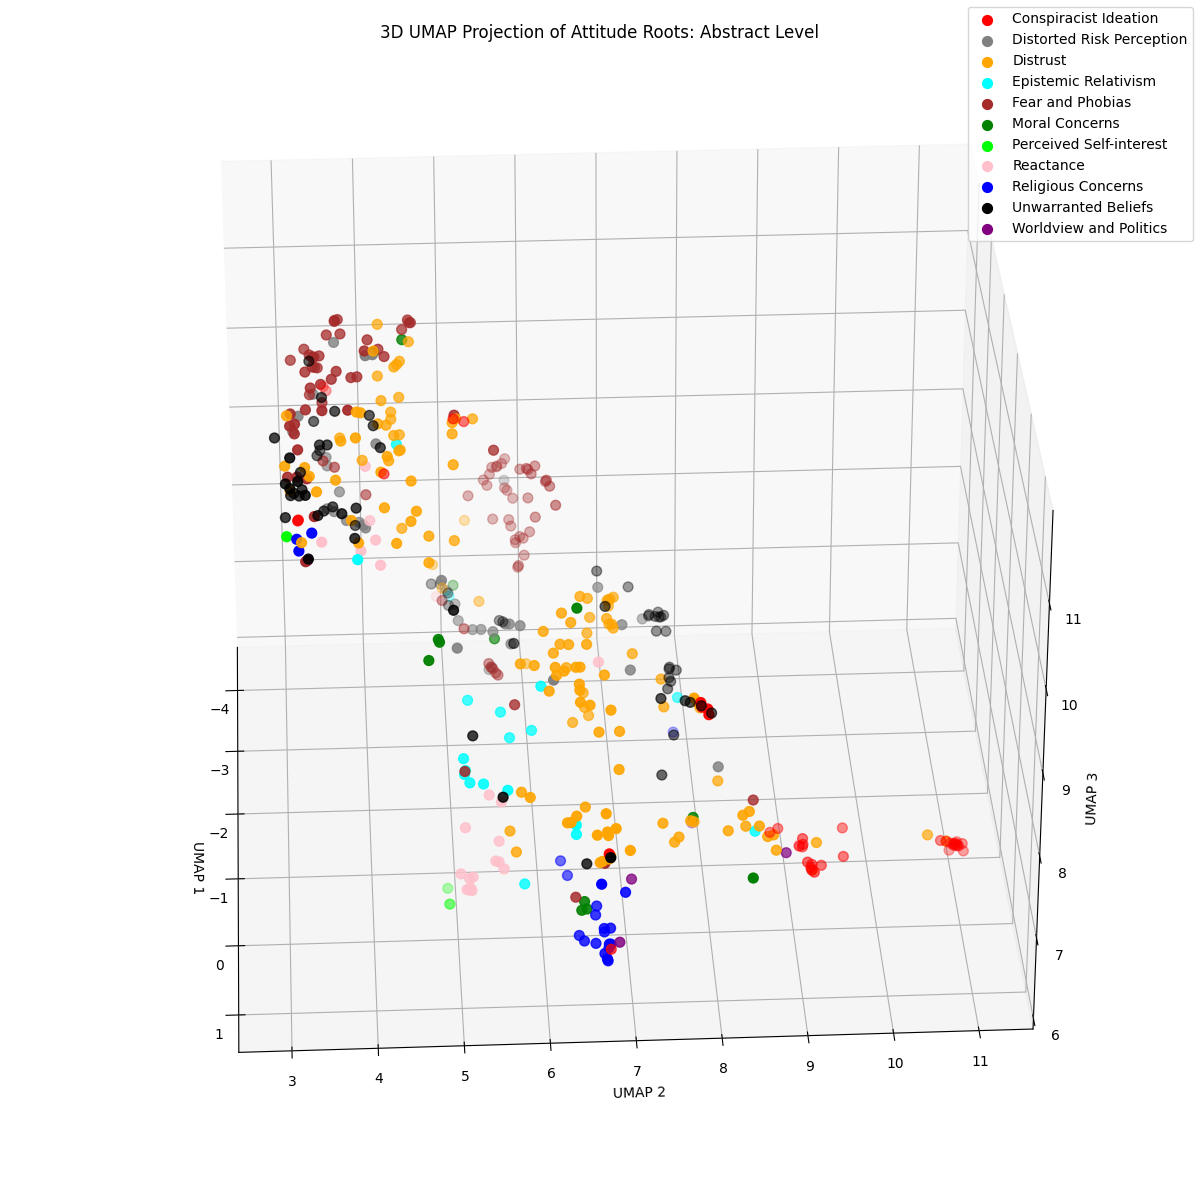

/tmp/ipykernel_122431/2814612596.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<IPython.core.display.Javascript object>


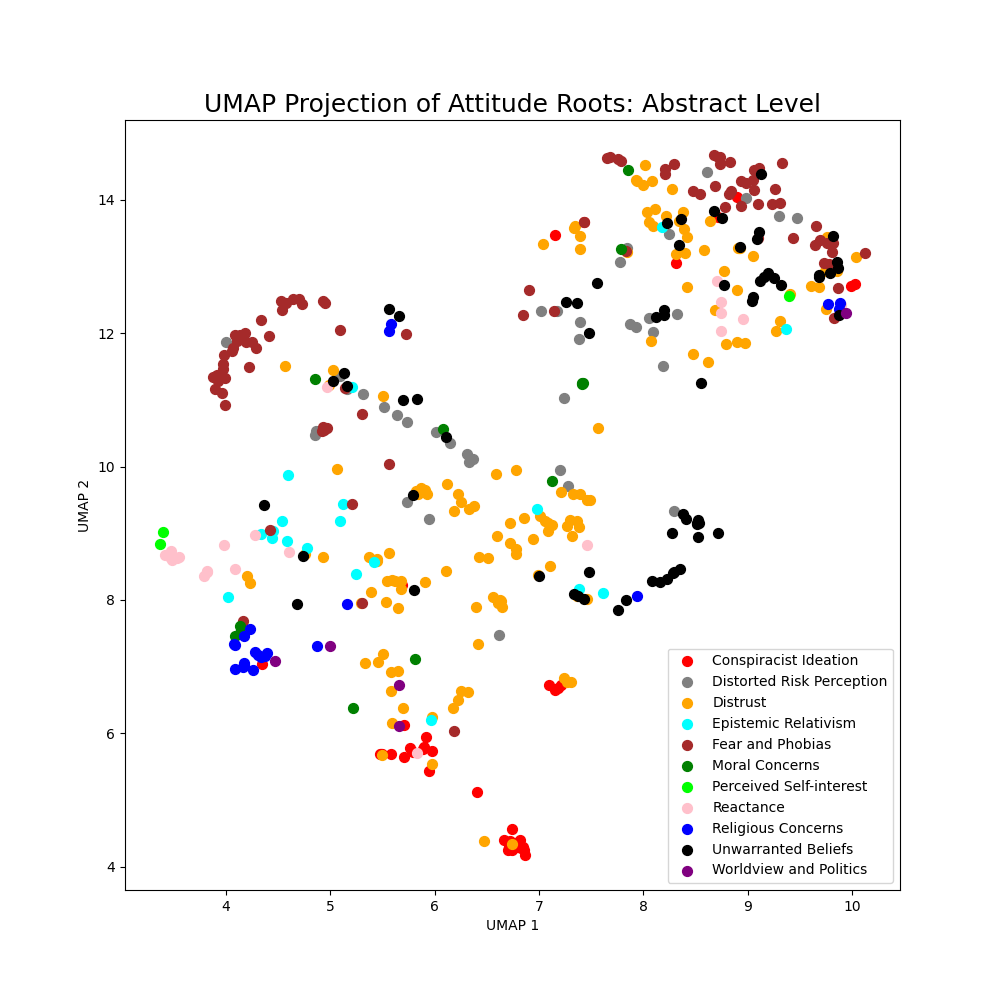

In [17]:
plot3dstuff(abstract_full, abs_map_3, c_dict_full, title='3D UMAP Projection of Attitude Roots: Abstract Level')
plotstuff(abstract_full, abs_map, c_dict_full, title='UMAP Projection of Attitude Roots: Abstract Level')

## Supervised Embedding Full

In [18]:
sup_fn_embedding = fit.fit_transform(study2_embeddings, y=study2_single_full.labels.to_list())
sup_fn_embedding_3 = fit_3.fit_transform(study2_embeddings, y=study2_single_full.labels.to_list())

<IPython.core.display.Javascript object>


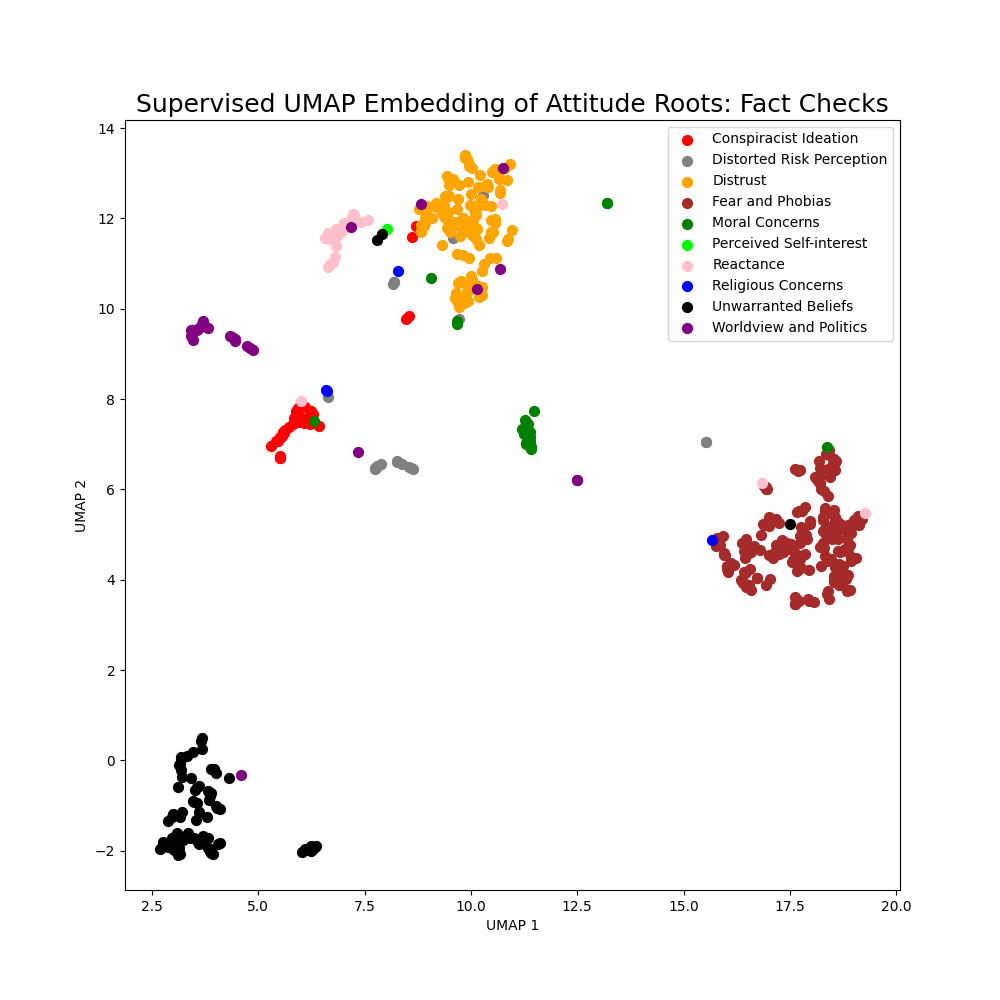

In [19]:
plotstuff(study2_single_full, sup_fn_embedding, c_dict_full, "Supervised UMAP Embedding of Attitude Roots: Fact Checks")

<IPython.core.display.Javascript object>


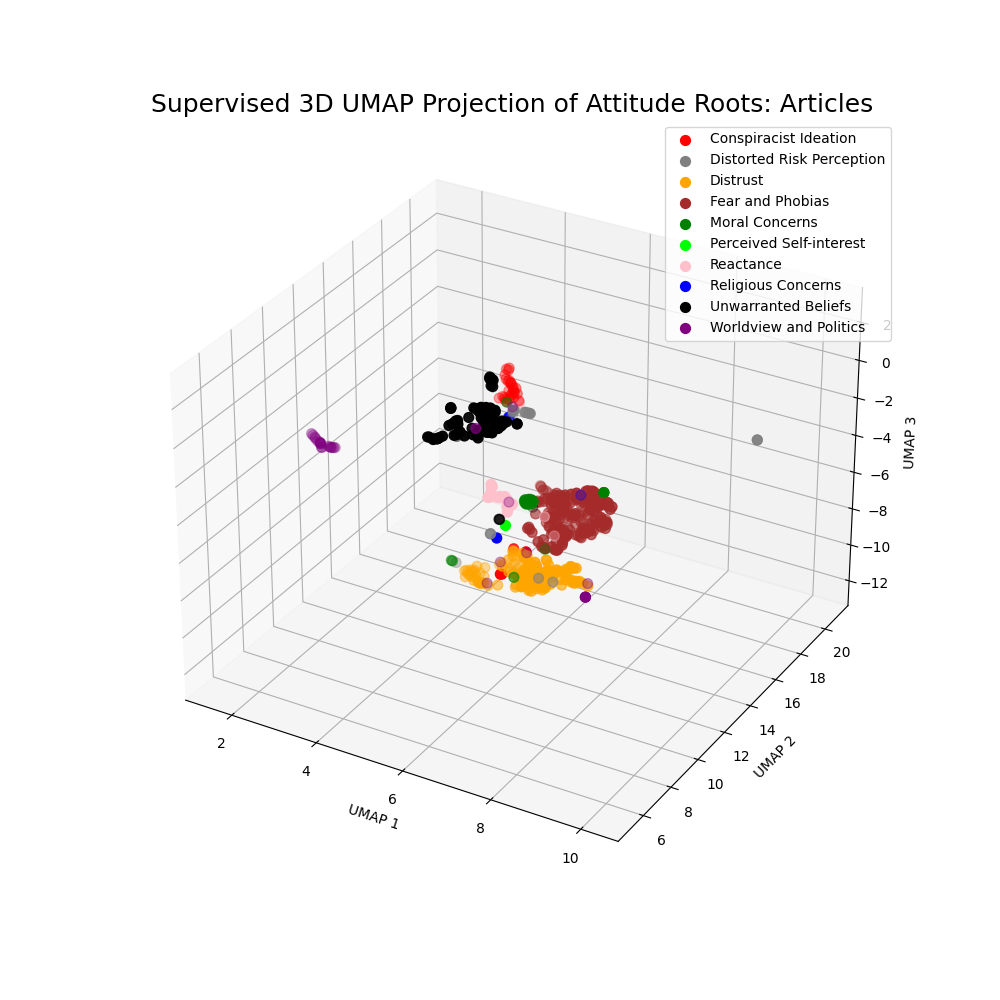

<IPython.core.display.Javascript object>


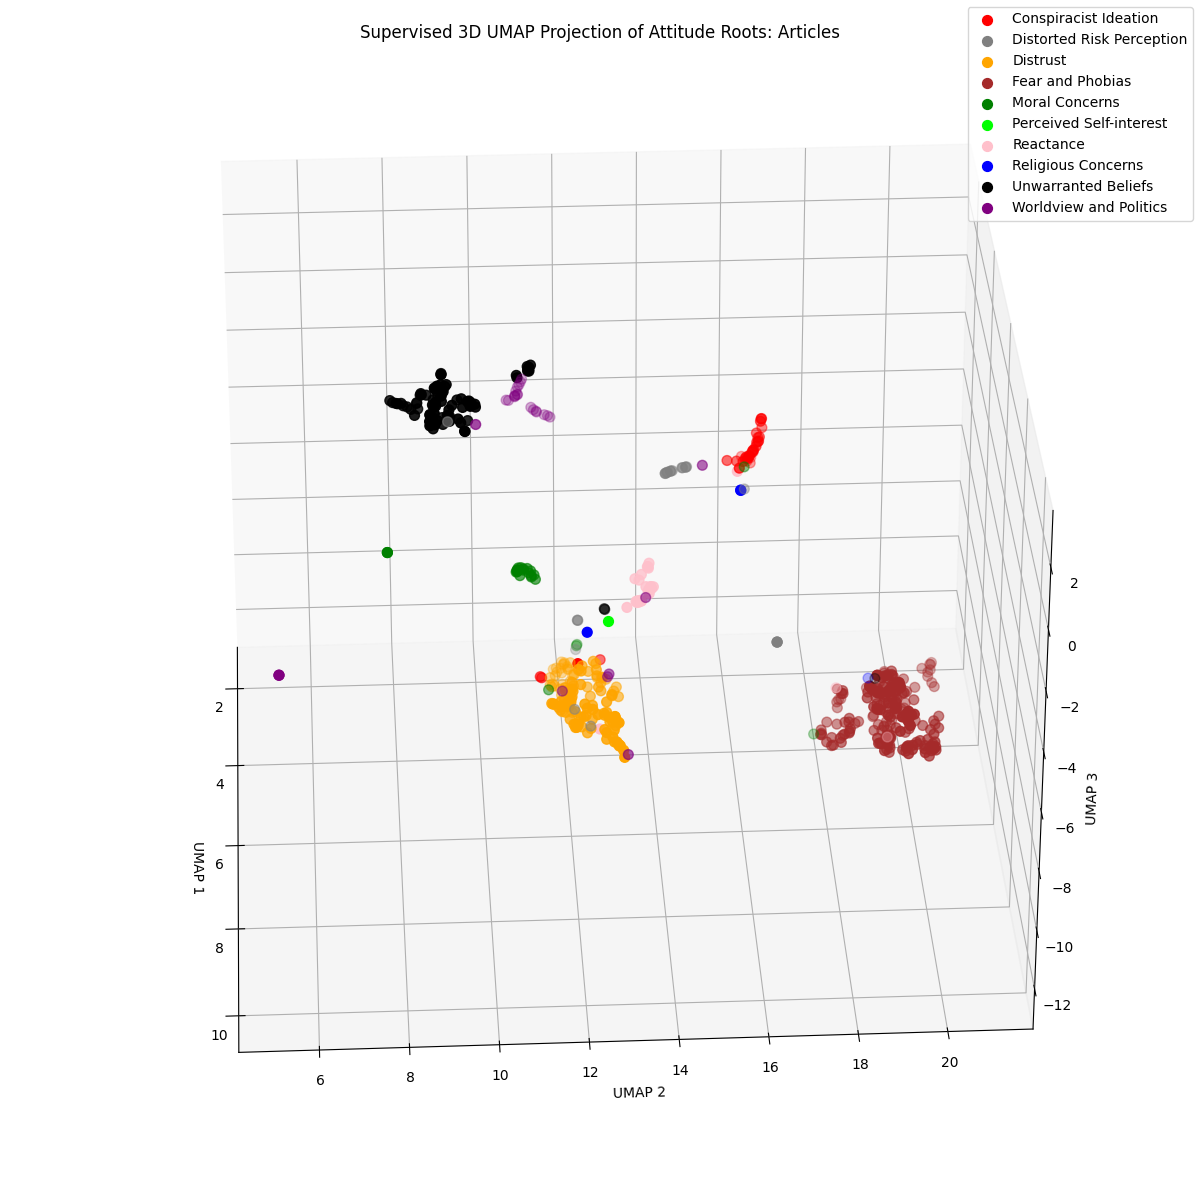

/tmp/ipykernel_122431/2814612596.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [20]:
plot3dstuff(study2_single_full, sup_fn_embedding_3, c_dict_full, title='Supervised 3D UMAP Projection of Attitude Roots: Articles')

## Random Supervised Embedding

In [21]:
from random import shuffle
random_fn = study2_single_full.labels.to_list().copy()
set_seed()
shuffle(random_fn)
ran_sup_fn_embedding = fit.fit_transform(study2_embeddings , y=random_fn)
ran_sup_fn_embedding_3 = fit_3.fit_transform(study2_embeddings, y=random_fn)

<IPython.core.display.Javascript object>


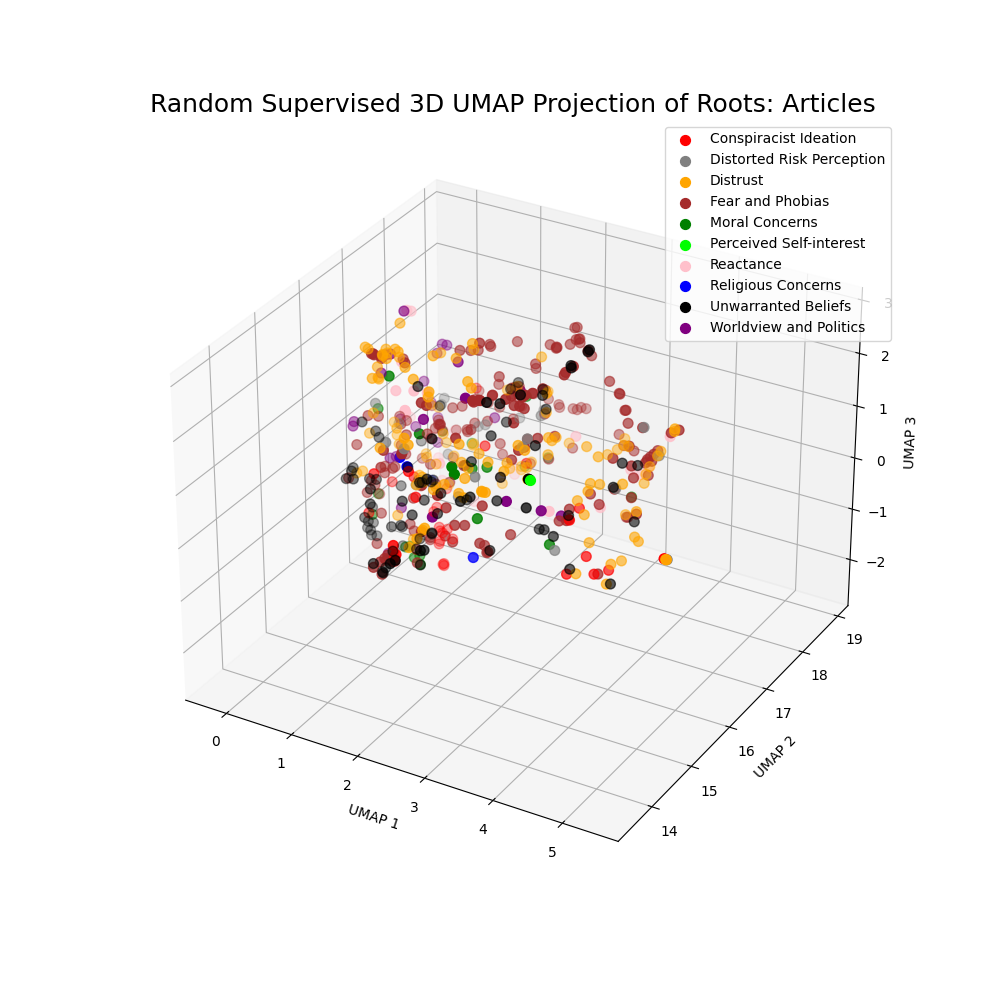

<IPython.core.display.Javascript object>


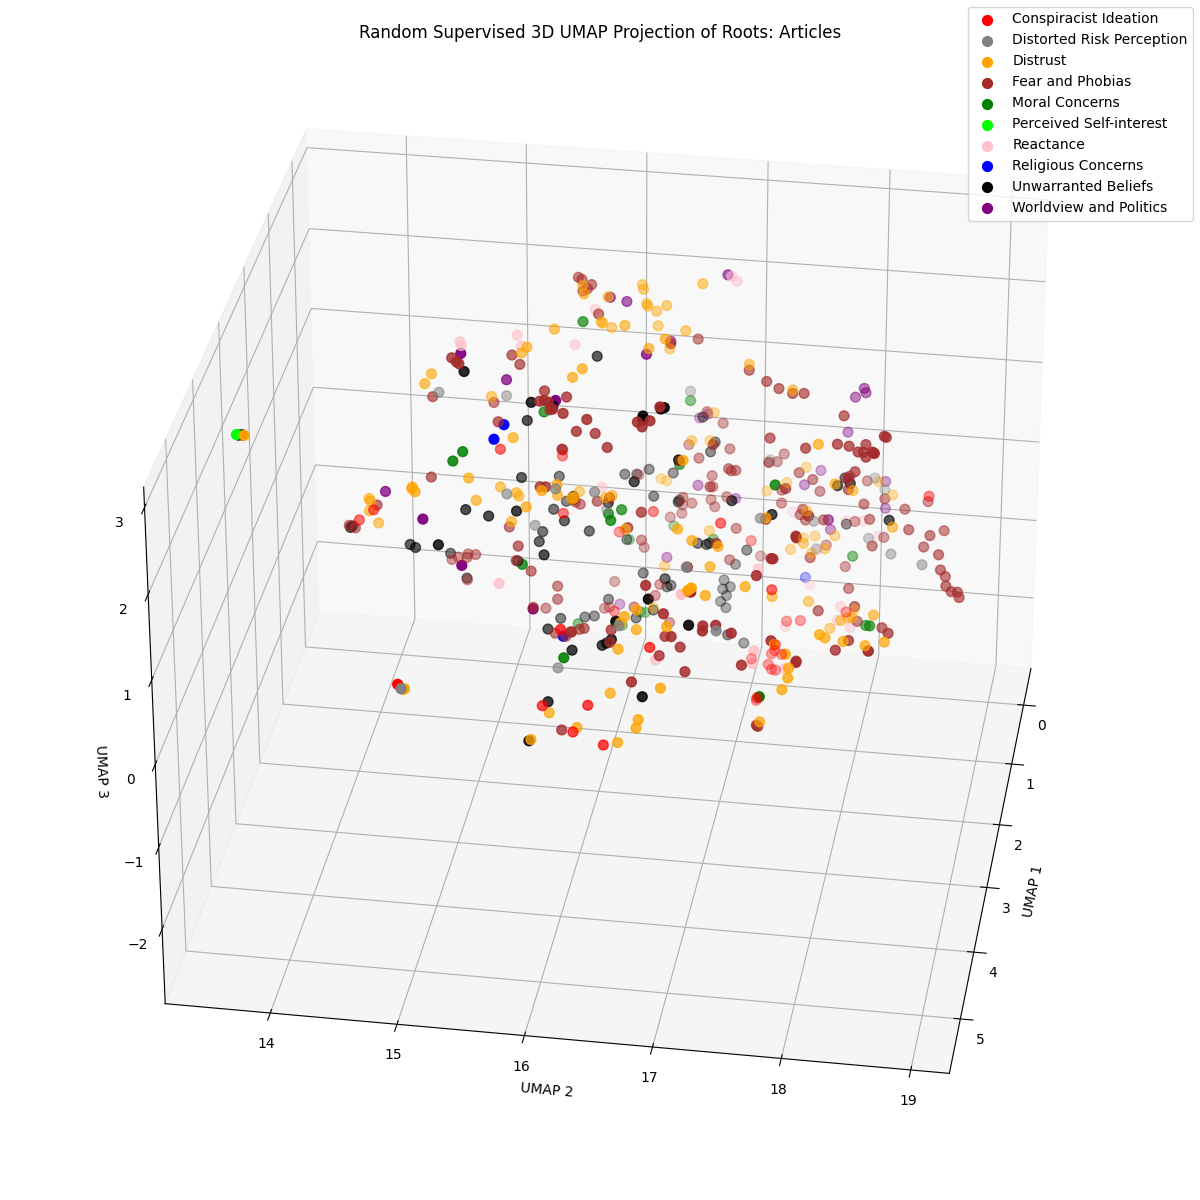

/tmp/ipykernel_122431/2814612596.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [22]:
plot3dstuff(study2_single_full, ran_sup_fn_embedding_3, c_dict_full, title='Random Supervised 3D UMAP Projection of Roots: Articles')

<IPython.core.display.Javascript object>


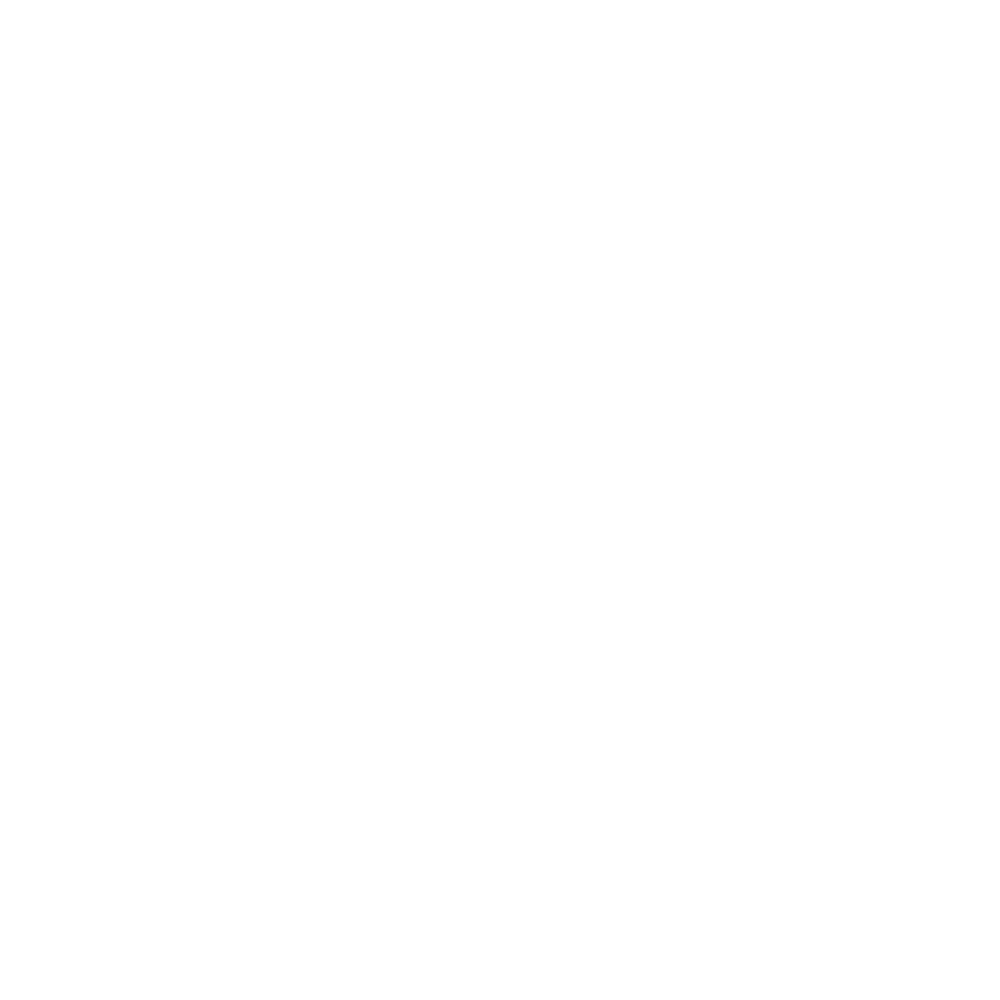

In [23]:
plotstuff(study2_single_full, ran_sup_fn_embedding, c_dict_full, 'Random Supervised UMAP Projection of Roots: Fact Checks')